In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv("/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/데이터/id_formation.csv", encoding='cp949', index_col=0)
data.head()

,id_formation,formation,labels,matchResult
0,004ed741426633f14e3e8b5b_442,442,0,승
1,004ed741426633f14e3e8b5b_442,442,0,패
2,004ed741426633f14e3e8b5b_442,442,0,무
3,004ed741426633f14e3e8b5b_442,442,0,패
4,004ed741426633f14e3e8b5b_442,442,0,승


In [3]:
#ids = pd.DataFrame(data['id_formation'].apply(lambda x: x[:-4]).unique(),columns=['ids'])
#ids.to_csv('/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/unique_id.csv')

In [4]:
def scoring(x):
    if x == '승':
        return 3
    elif x== '무':
        return 1
    else:
        return 0

data['result'] = data['matchResult'].apply(lambda x : 1 if x=='승' else 0)
data['score'] = data['matchResult'].apply(lambda x : scoring(x))

In [5]:
results = pd.DataFrame(data.groupby(['id_formation','formation','labels']).result.mean())
results.reset_index(inplace=True)

In [6]:
results

,id_formation,formation,labels,result
0,004ed741426633f14e3e8b5b_442,442,0,0.300000
1,009357e613446985dfd18622_451,451,1,0.250000
2,00c0fec278956d51bb63a3a2_523,523,2,0.666667
3,01247880cf81e161d85bf2f3_523,523,1,0.454545
4,014c6e8a031b7941ee2f9b24_433,433,2,0.437500
...,...,...,...,...
1221,ff0bf8051f28b4acbdde7fe4_523,523,1,0.411765
1222,ff0e111c983ab5bc8c87585d_451,451,0,0.285714
1223,ff1ecdb5beea39071b1dd097_451,451,2,0.533333
1224,ff24e2a7f7906b849f9aa7ea_523,523,1,0.500000


<Axes: >

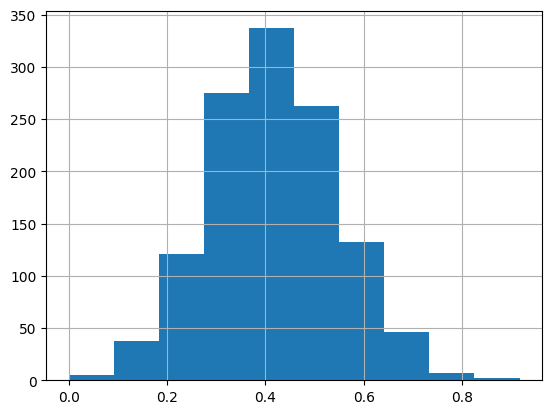

In [7]:
results.result.hist() # 정규분포 shape

In [8]:
# 범주형 변수를 category로 변환
results['formation'] = results['formation'].astype('str')
results['labels'] = results['labels'].astype('str')

In [9]:
results['group_label'] = results['labels'] +'__' + results['formation']

In [10]:
results.describe()

,result
count,1226.000000
mean,0.416585
std,0.129472
min,0.000000
25%,0.333333
50%,0.414216
75%,0.500000
max,0.916667


In [11]:
results = results.loc[(results.result>0.1) & (results.result<0.81),:]

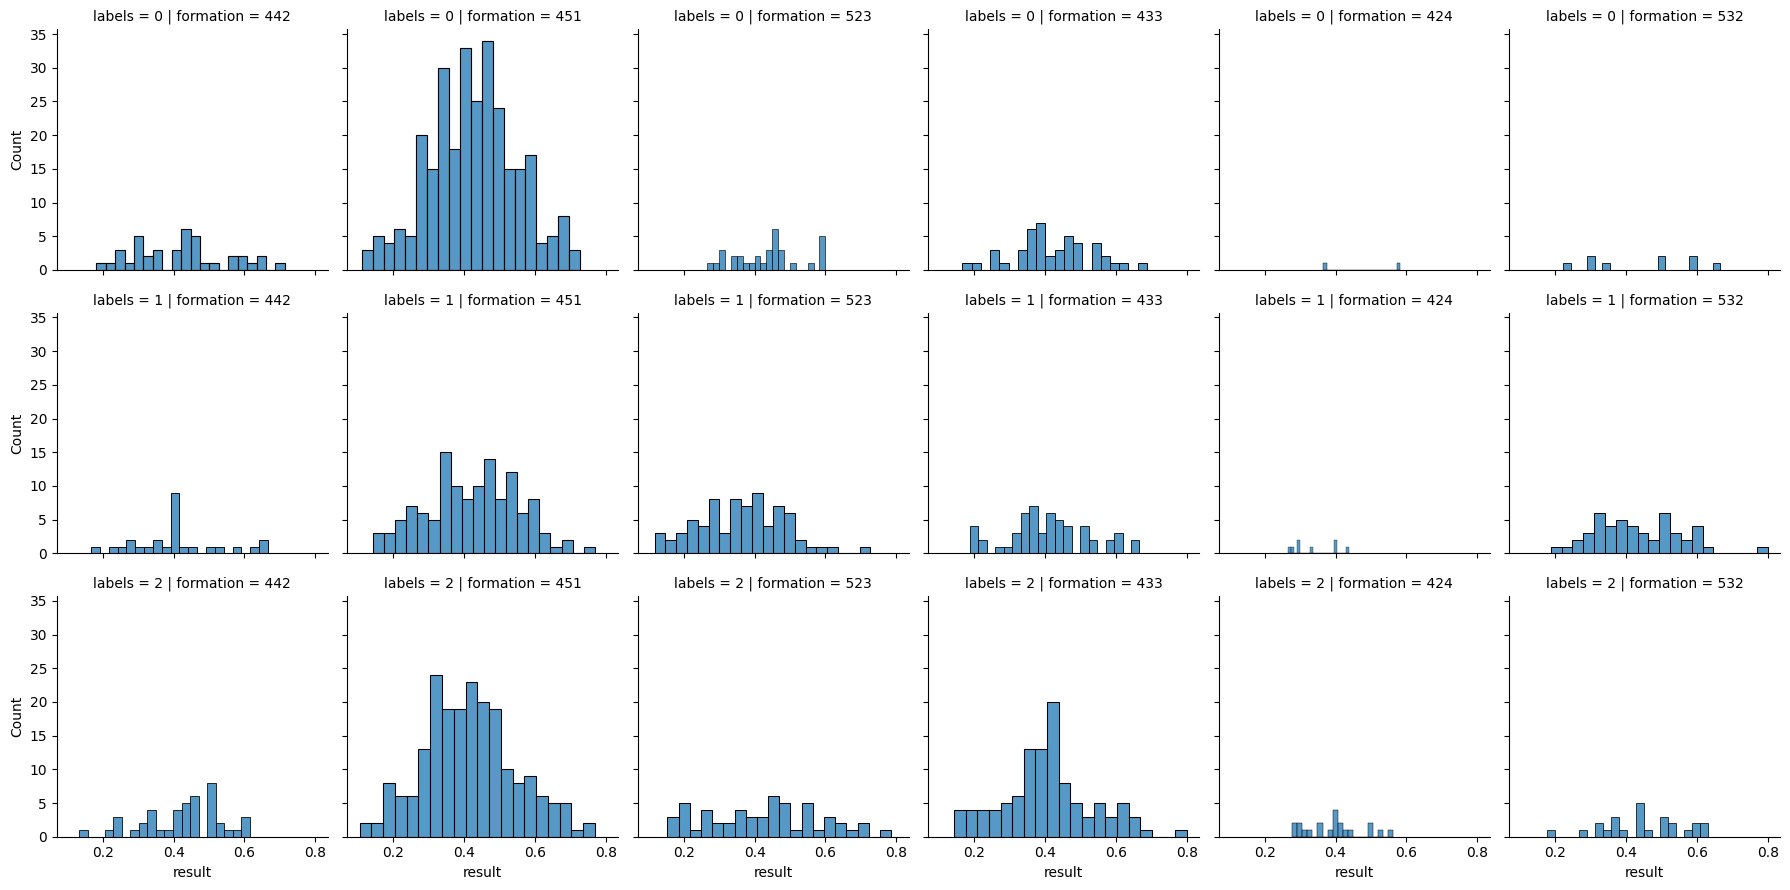

In [12]:
# 그룹 별 히스토그램 그리기
g = sns.FacetGrid(results, col='formation', row='labels')
g.map(sns.histplot, 'result',bins=20)

# 그래프 보여주기
plt.show()

# 이렇게 보면 정규분포인지 안보임...

In [20]:
sorted(results.group_label.unique())[6:12]

['1__424', '1__433', '1__442', '1__451', '1__523', '1__532']

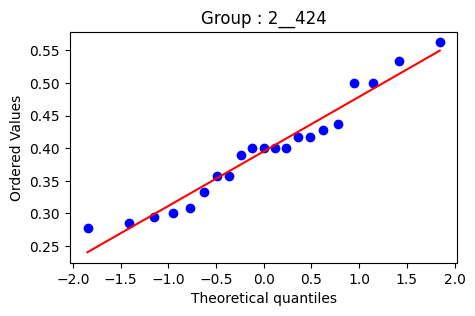

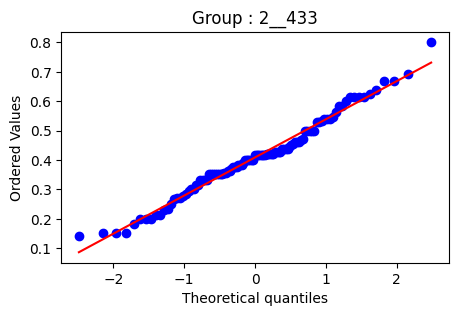

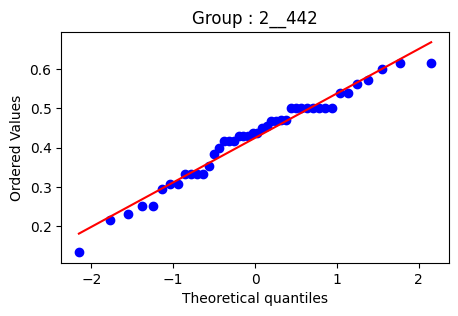

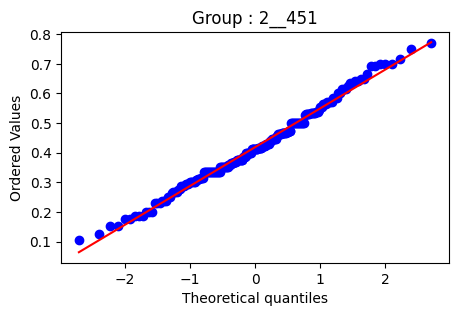

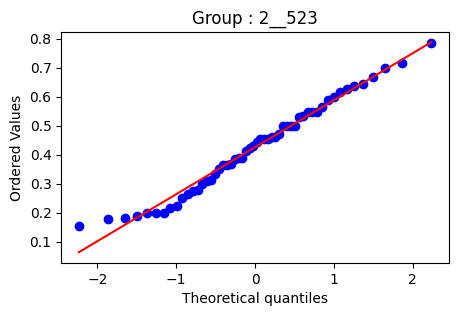

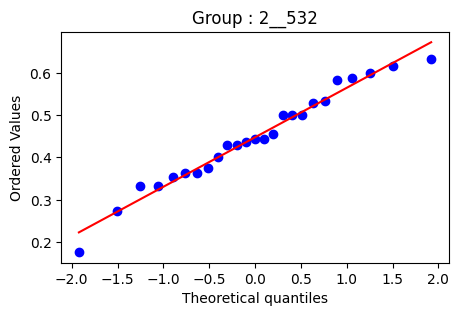

In [22]:
import scipy.stats as stats

# qqplot 그리기
# 정규 분포 객체 생성
norm_dist = stats.norm(loc=0, scale=1)

for i in sorted(results.group_label.unique())[12:]:
    fig, ax = plt.subplots(figsize=(5,3))
    stats.probplot(results.loc[results['group_label']==i,'result'], dist=norm_dist, plot=ax)
    plt.title(f'Group : {i}')
    plt.show()

In [14]:
results.groupby('group_label').size()

group_label
0__424      2
0__433     45
0__442     40
0__451    289
0__523     33
0__532      9
1__424      8
1__433     55
1__442     27
1__451    127
1__523     75
1__532     48
2__424     21
2__433    107
2__442     44
2__451    207
2__523     54
2__532     25
dtype: int64

In [15]:
from scipy.stats import shapiro

stat, p_value = shapiro(results.loc[results['group_label']=='0__523','result'])
# 결과 출력
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")


Statistic: 0.9464, p-value: 0.1047


In [16]:
stat, p_value = shapiro(results.loc[results['group_label']=='1__442','result'])
# 결과 출력
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

Statistic: 0.9447, p-value: 0.1589


# 정규성 검정 결과 : 424는 빼고 진행한다.

In [17]:
results = results.loc[results.formation!='424',]

In [18]:
#results = results.loc[results.group_label!='0__532',]

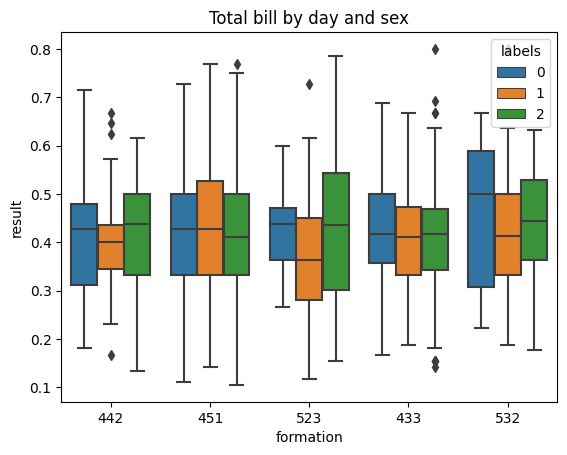

In [19]:
# 그룹 별 박스플롯 그리기
sns.boxplot(x='formation', y='result',hue='labels', data=results)

# 그래프 제목 설정
plt.title('Total bill by day and sex')

# 그래프 보여주기
plt.show()


In [20]:
results

,id_formation,formation,labels,result,group_label
0,004ed741426633f14e3e8b5b_442,442,0,0.300000,0__442
1,009357e613446985dfd18622_451,451,1,0.250000,1__451
2,00c0fec278956d51bb63a3a2_523,523,2,0.666667,2__523
3,01247880cf81e161d85bf2f3_523,523,1,0.454545,1__523
4,014c6e8a031b7941ee2f9b24_433,433,2,0.437500,2__433
...,...,...,...,...,...
1221,ff0bf8051f28b4acbdde7fe4_523,523,1,0.411765,1__523
1222,ff0e111c983ab5bc8c87585d_451,451,0,0.285714,0__451
1223,ff1ecdb5beea39071b1dd097_451,451,2,0.533333,2__451
1224,ff24e2a7f7906b849f9aa7ea_523,523,1,0.500000,1__523


# 등분산검정

In [21]:
from scipy.stats import levene

# df: 데이터프레임, group: 범주형 변수
grouped = results.groupby('group_label')
group_names = results['group_label'].unique()

# 등분산 검정
stat, pvalue = levene(*[results.loc[results['group_label']==g, 'result'] for g in group_names])
print("Levene test statistic:", stat)
print("p-value:", pvalue)

Levene test statistic: 1.5829508222196325
p-value: 0.07726182782946933


# 가정 모두 만족. ANOVA 시작

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 모델 생성
model = ols('result ~ formation + labels + formation:labels', data=results).fit()

# ANOVA 분석
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
formation,0.107263,4.0,1.691146,0.149655
labels,0.063388,2.0,1.998791,0.135961
formation:labels,0.132251,8.0,1.042559,0.401714
Residual,18.552147,1170.0,NaN,NaN


In [23]:
# 모델 생성
model = ols('result ~ formation', data=results).fit()

# ANOVA 분석
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
formation,0.117522,4.0,1.849236,0.117114
Residual,18.747786,1180.0,NaN,NaN


In [24]:
data

,id_formation,formation,labels,matchResult,result,score
0,004ed741426633f14e3e8b5b_442,442,0,승,1,3
1,004ed741426633f14e3e8b5b_442,442,0,패,0,0
2,004ed741426633f14e3e8b5b_442,442,0,무,0,1
3,004ed741426633f14e3e8b5b_442,442,0,패,0,0
4,004ed741426633f14e3e8b5b_442,442,0,승,1,3
...,...,...,...,...,...,...
18147,ff9451d4c60fdf7c9e44a47e_532,532,2,패,0,0
18148,ff9451d4c60fdf7c9e44a47e_532,532,2,승,1,3
18149,ff9451d4c60fdf7c9e44a47e_532,532,2,패,0,0
18150,ff9451d4c60fdf7c9e44a47e_532,532,2,승,1,3


In [25]:
results2 = pd.DataFrame(data.groupby(['id_formation','formation','labels']).score.mean())
results2.reset_index(inplace=True)
results2 = results2[results2.formation != 424]
results['score'] = results2.score.copy()

<ipython-input-25-aa53fa652756>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['score'] = results2.score.copy()


In [26]:
# 모델 생성
model = ols('score ~ formation + labels + formation:labels', data=results).fit()

# ANOVA 분석
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
formation,0.573855,4.0,1.261086,0.283441
labels,0.374709,2.0,1.646899,0.193093
formation:labels,0.666021,8.0,0.731813,0.663485
Residual,133.101710,1170.0,NaN,NaN


<Axes: >

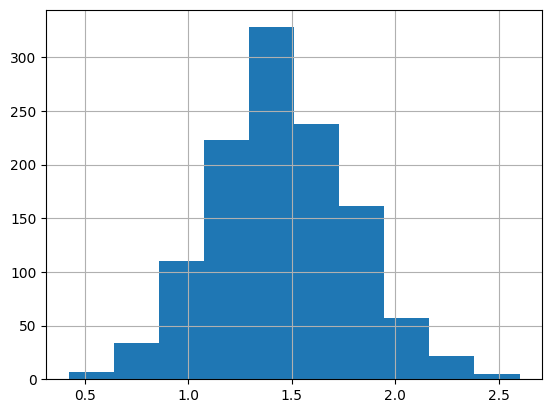

In [27]:
results.score.hist()